In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.metrics.intrinsic_dimension import IntrinsicDimension
from src.metrics.clustering import LabelClustering
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plot_config = {
    #'font.size': 12,           
    'axes.titlesize': 30,      
    'axes.labelsize': 29,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 23,
    'figure.figsize': (10,8),
    'lines.linewidth': 2.5,
    'lines.markersize': 10,
}


# Data visulization
The following snippet can be used to replicate some of the plot from the paper

## Intrinsic Dimension

In [2]:
def plotter(data, title, ylabel):
    # Set the style
    sns.set_style(
        "whitegrid",
        rc={"axes.edgecolor": ".15", "xtick.bottom": True, "ytick.left": True},
    )
    # Setup figure and axes for 2 plots in one row
    plt.figure(dpi = 200)
    layers = np.arange(0,data[0].shape[0])

    #Set ticks
    if layers.shape[0] < 50:
        tick_positions = np.arange(0, layers.shape[0], 4)  # Generates positions 0, 4, 8, ...
    else:
        tick_positions = np.arange(0, layers.shape[0], 8)  # Generates positions 0, 4, 8, ...

    tick_labels = tick_positions +1 # Get the corresponding labels from x

    
    names = ["0 shot pt", 
            "1 shot pt", 
            "2 shot pt",
            "5 shot pt",
            "0 shot ft"]
    markerstyle = ['o', 'o', 'o', 'o', 'x']
    
    for int_dim, label, markerstyle in zip(data, names, markerstyle):
        sns.scatterplot(x=layers, y=int_dim, marker= markerstyle)
        sns.lineplot(x=layers, y=int_dim, label=label)


    plt.xlabel("Layer")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(ticks=tick_positions, labels=tick_labels)
    # tick_positions_y = np.arange(2.5, 22, 22/10).round(3)
    # plt.yticks(tick_positions_y)
    plt.tick_params(axis='y')
    plt.legend()
    plt.tight_layout()
    plt.rcParams.update(plot_config)
    plt.show()

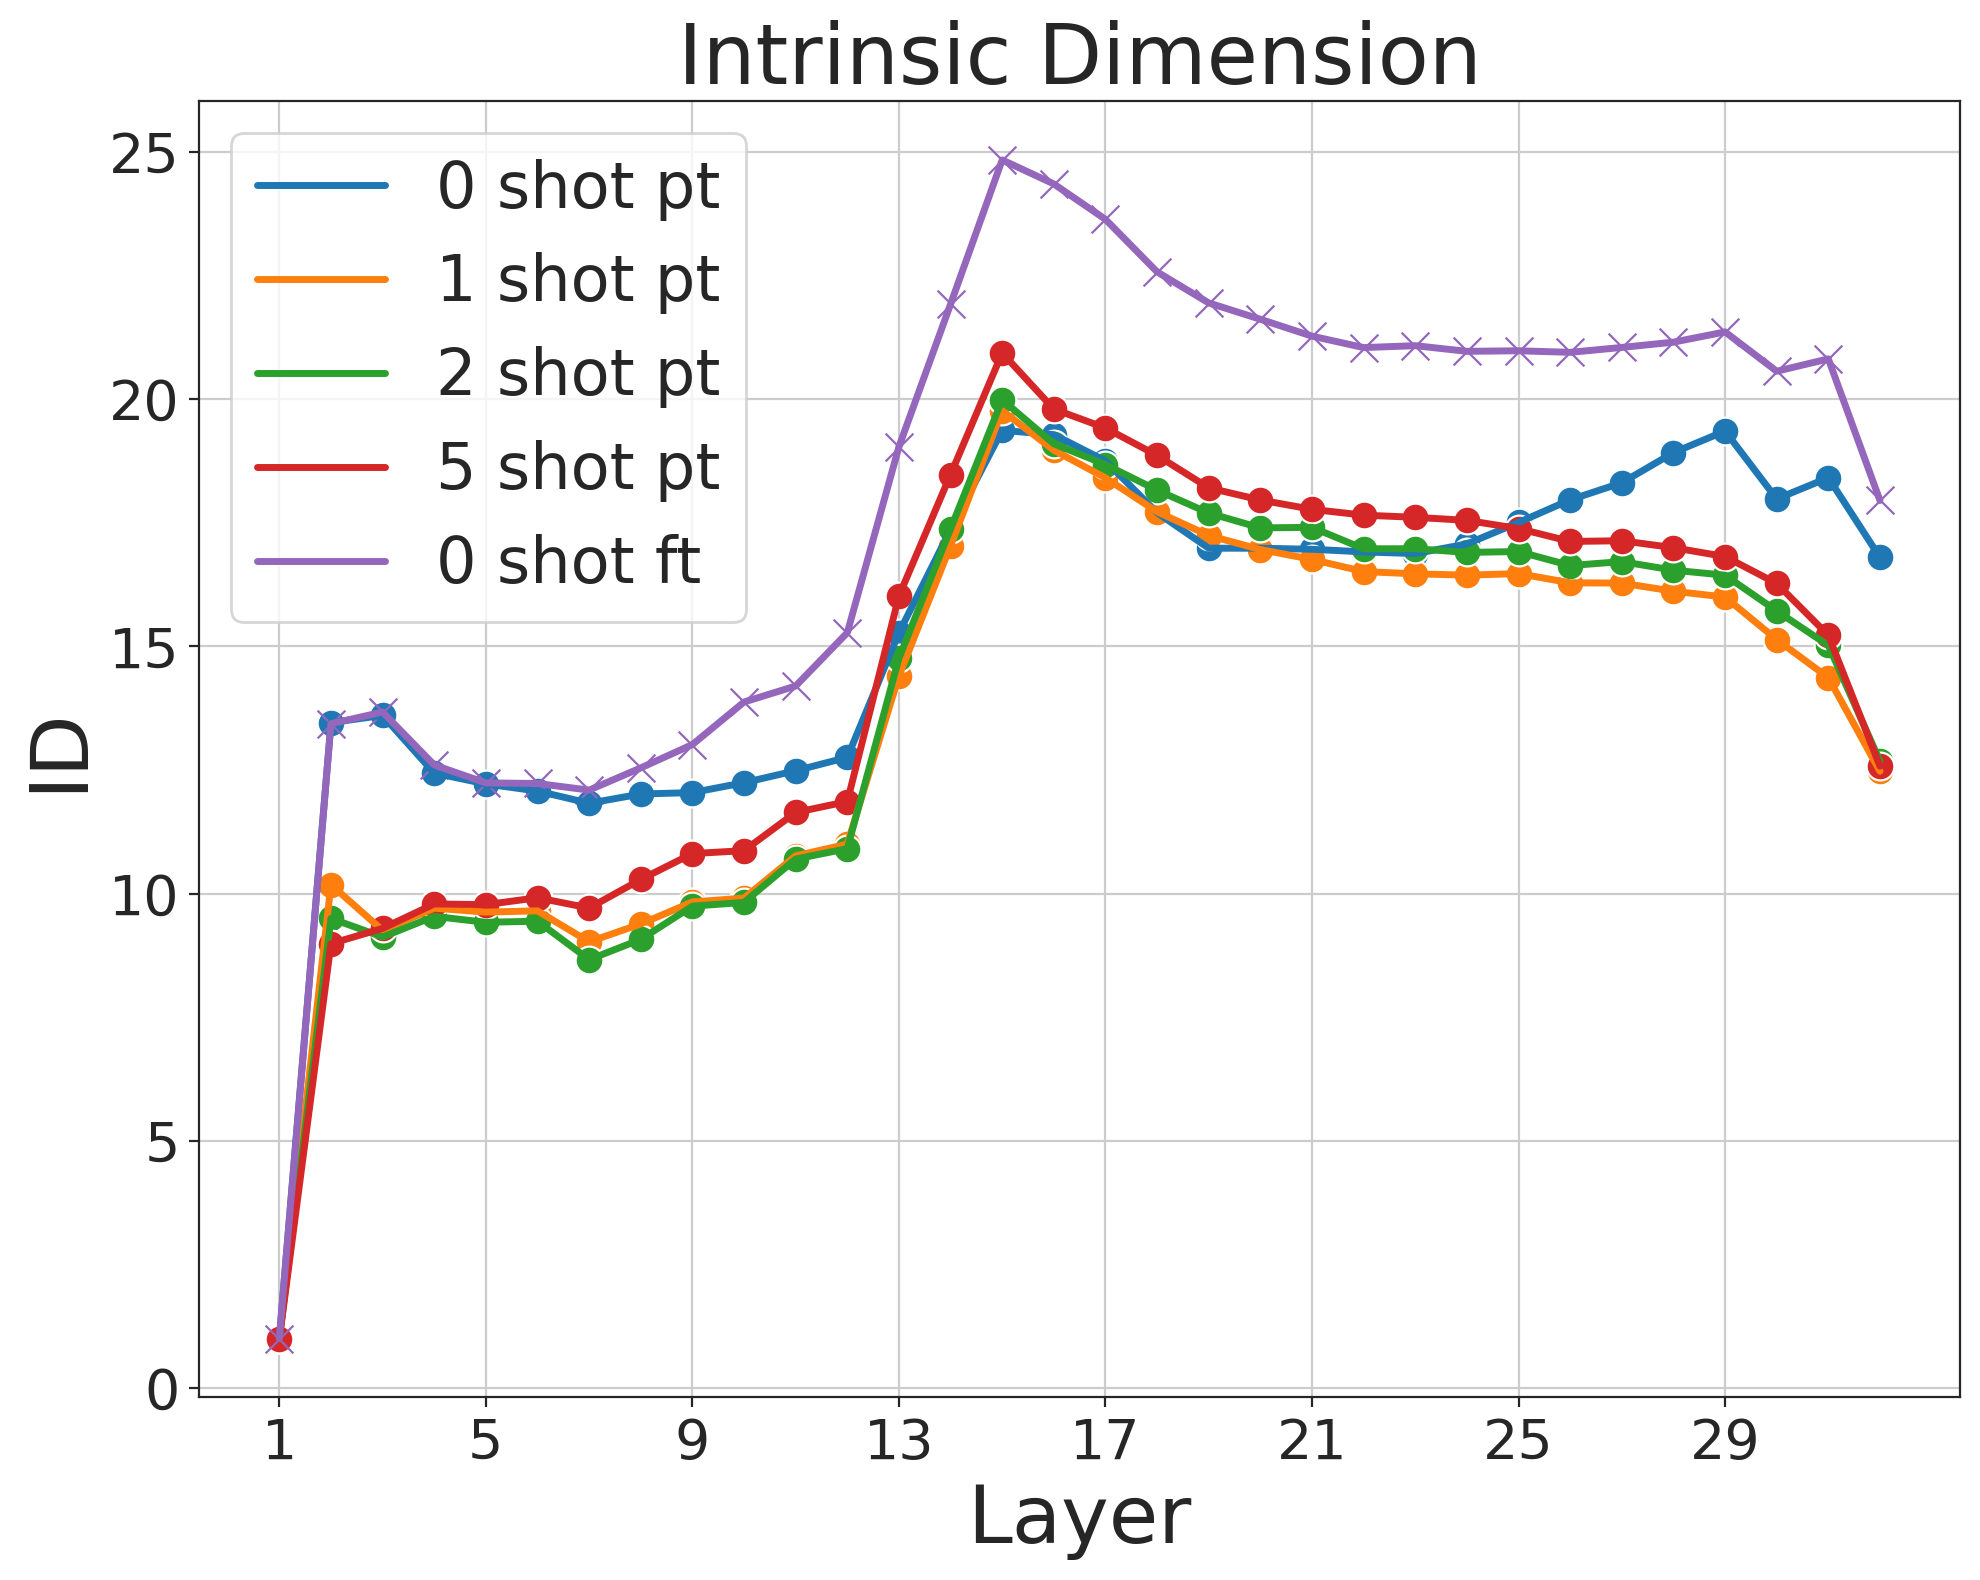

In [13]:
_PATH = Path("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens"\
        "/repo/results/evaluated_test/random_order/llama-3-8b")

shot = [0,1,2,4]
data = []
for i in shot:
    intrinsic_dim = IntrinsicDimension(path= _PATH / f'{i}shot')
    data.append(intrinsic_dim.main())

_PATH_ft = Path("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens"
                "/repo/results/finetuned_dev_val_balanced_20samples/evaluated_test"
                "/llama-3-8b/4epochs/epoch_4/")

intrinsic_dim = IntrinsicDimension(path= _PATH_ft)
data.append(intrinsic_dim.main())
# Selecting the order of nearest neighbors considered in gride
data_nn_index = [arr[:,-1] for arr in data]
plotter(data_nn_index, "Intrinsic Dimension", "ID")

## Clustering

### Subjects

Processing layers:  75%|███████▌  | 24/32 [01:55<00:42,  5.34s/it]/u/dssc/zenocosini/helm_suite/representation_landscape_fs_ft/.venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Processing layers: 100%|██████████| 32/32 [02:23<00:00,  4.49s/it]


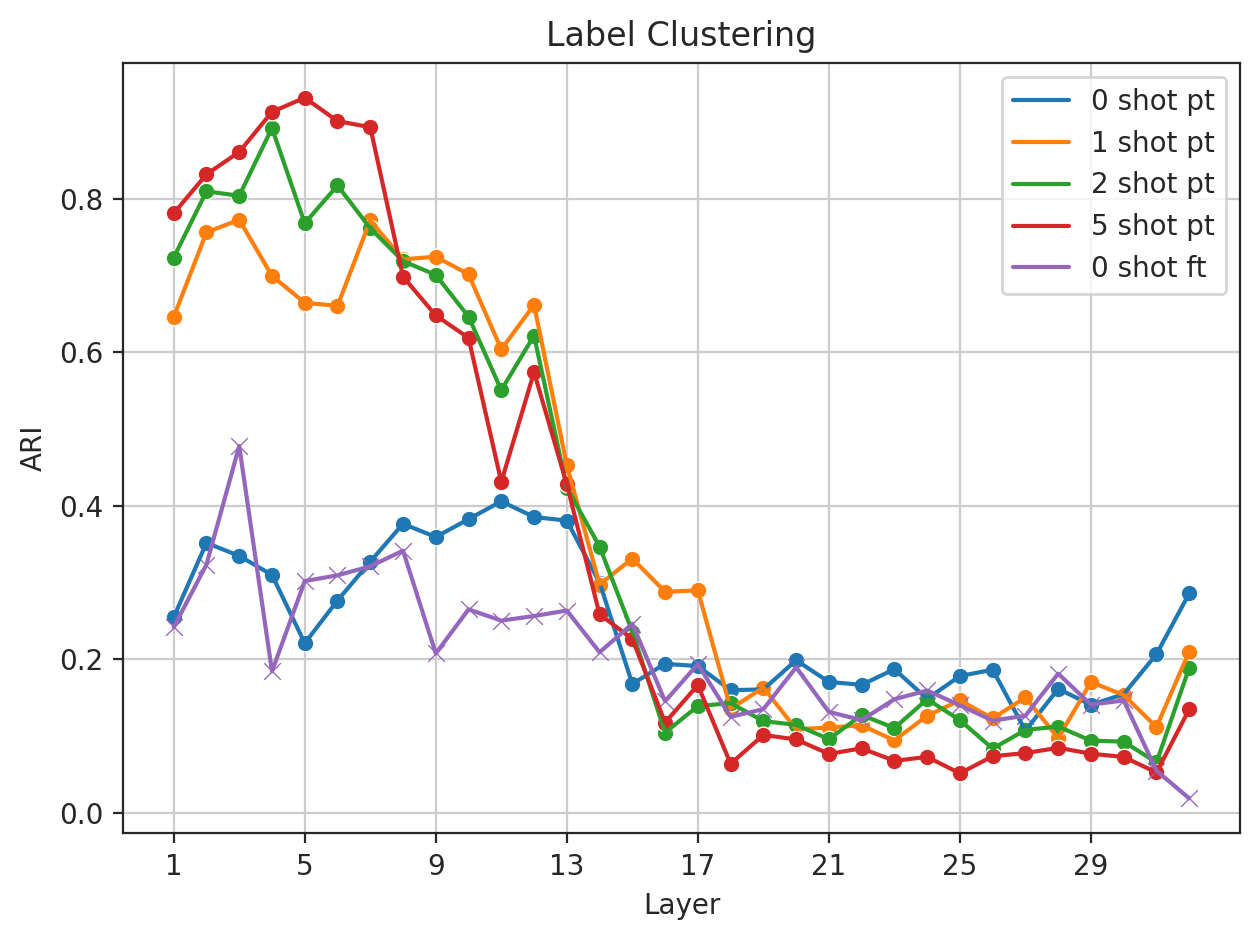

In [3]:
_PATH = Path("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens"\
        "/repo/results/evaluated_test/random_order/llama-3-8b")

shot = [0,1,2,4]
data_subjects = []
for i in shot:
    clustering = LabelClustering(path= _PATH / f'{i}shot')
    data_subjects.append(clustering.main(label="subjects",
                                z=1.6,
                                instance_per_sub=-1,
                                full_tensor=True))
    

_PATH_ft = Path("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens"
                "/repo/results/finetuned_dev_val_balanced_20samples/evaluated_test"
                "/llama-3-8b/4epochs/epoch_4/")

clustering = LabelClustering(path= _PATH_ft)
data_subjects.append(clustering.main(label="subjects",
                            z=1.6,
                            instance_per_sub=-1,
                            full_tensor=True))
ari = [np.array(i['adjusted_rand_score']) for i in data_subjects]
plotter(ari, "Label Clustering", "ARI")


### Letters

In [ ]:
_PATH = Path("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens"\
        "/repo/results/evaluated_test/random_order/llama-3-8b")

shot = [0,1,2,4]
data_preds = []
for i in shot:
    clustering = LabelClustering(path= _PATH / f'{i}shot')
    data_preds.append(clustering.main(label="predictions",
                                z=1.6,
                                instance_per_sub=-1))
    

_PATH_ft = Path("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens"
                "/repo/results/finetuned_dev_val_balanced_20samples/evaluated_test"
                "/llama-3-8b/4epochs/epoch_4/")

clustering = LabelClustering(path= _PATH_ft)
data_preds.append(clustering.main(label="predictions",
                            z=1.6,
                            instance_per_sub=-1))
ari = [np.array(i['adjusted_rand_score']) for i in data_preds]
plotter(ari, "Label Clustering", "ARI")


### Clusters Analysis

#### Number of clusters

For the following analysis we need to identify core points for each cluster, so we recompute the clustering with `halo==True`

In [12]:
_PATH = Path("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens"\
        "/repo/results/evaluated_test/random_order/llama-3-8b")

shot = [0,1,2,4]
data_subjects = []
for i in shot:
    clustering = LabelClustering(path= _PATH / f'{i}shot')
    data_subjects.append(clustering.main(label="subjects",
                                z=1.6,
                                halo=True,
                                instance_per_sub=-1))
    

_PATH_ft = Path("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens"
                "/repo/results/finetuned_dev_val_balanced_20samples/evaluated_test"
                "/llama-3-8b/4epochs/epoch_4/")

clustering = LabelClustering(path= _PATH_ft)
data_subjects.append(clustering.main(label="subjects",
                            z=1.6,
                            halo=True,
                            instance_per_sub=-1))


Processing layers: 100%|██████████| 32/32 [00:00<00:00, 46.10it/s]


In [17]:
label_clustering = LabelClustering(path= _PATH)
metrics_subject = label_clustering.compute_additional_metrics(data_subjects)

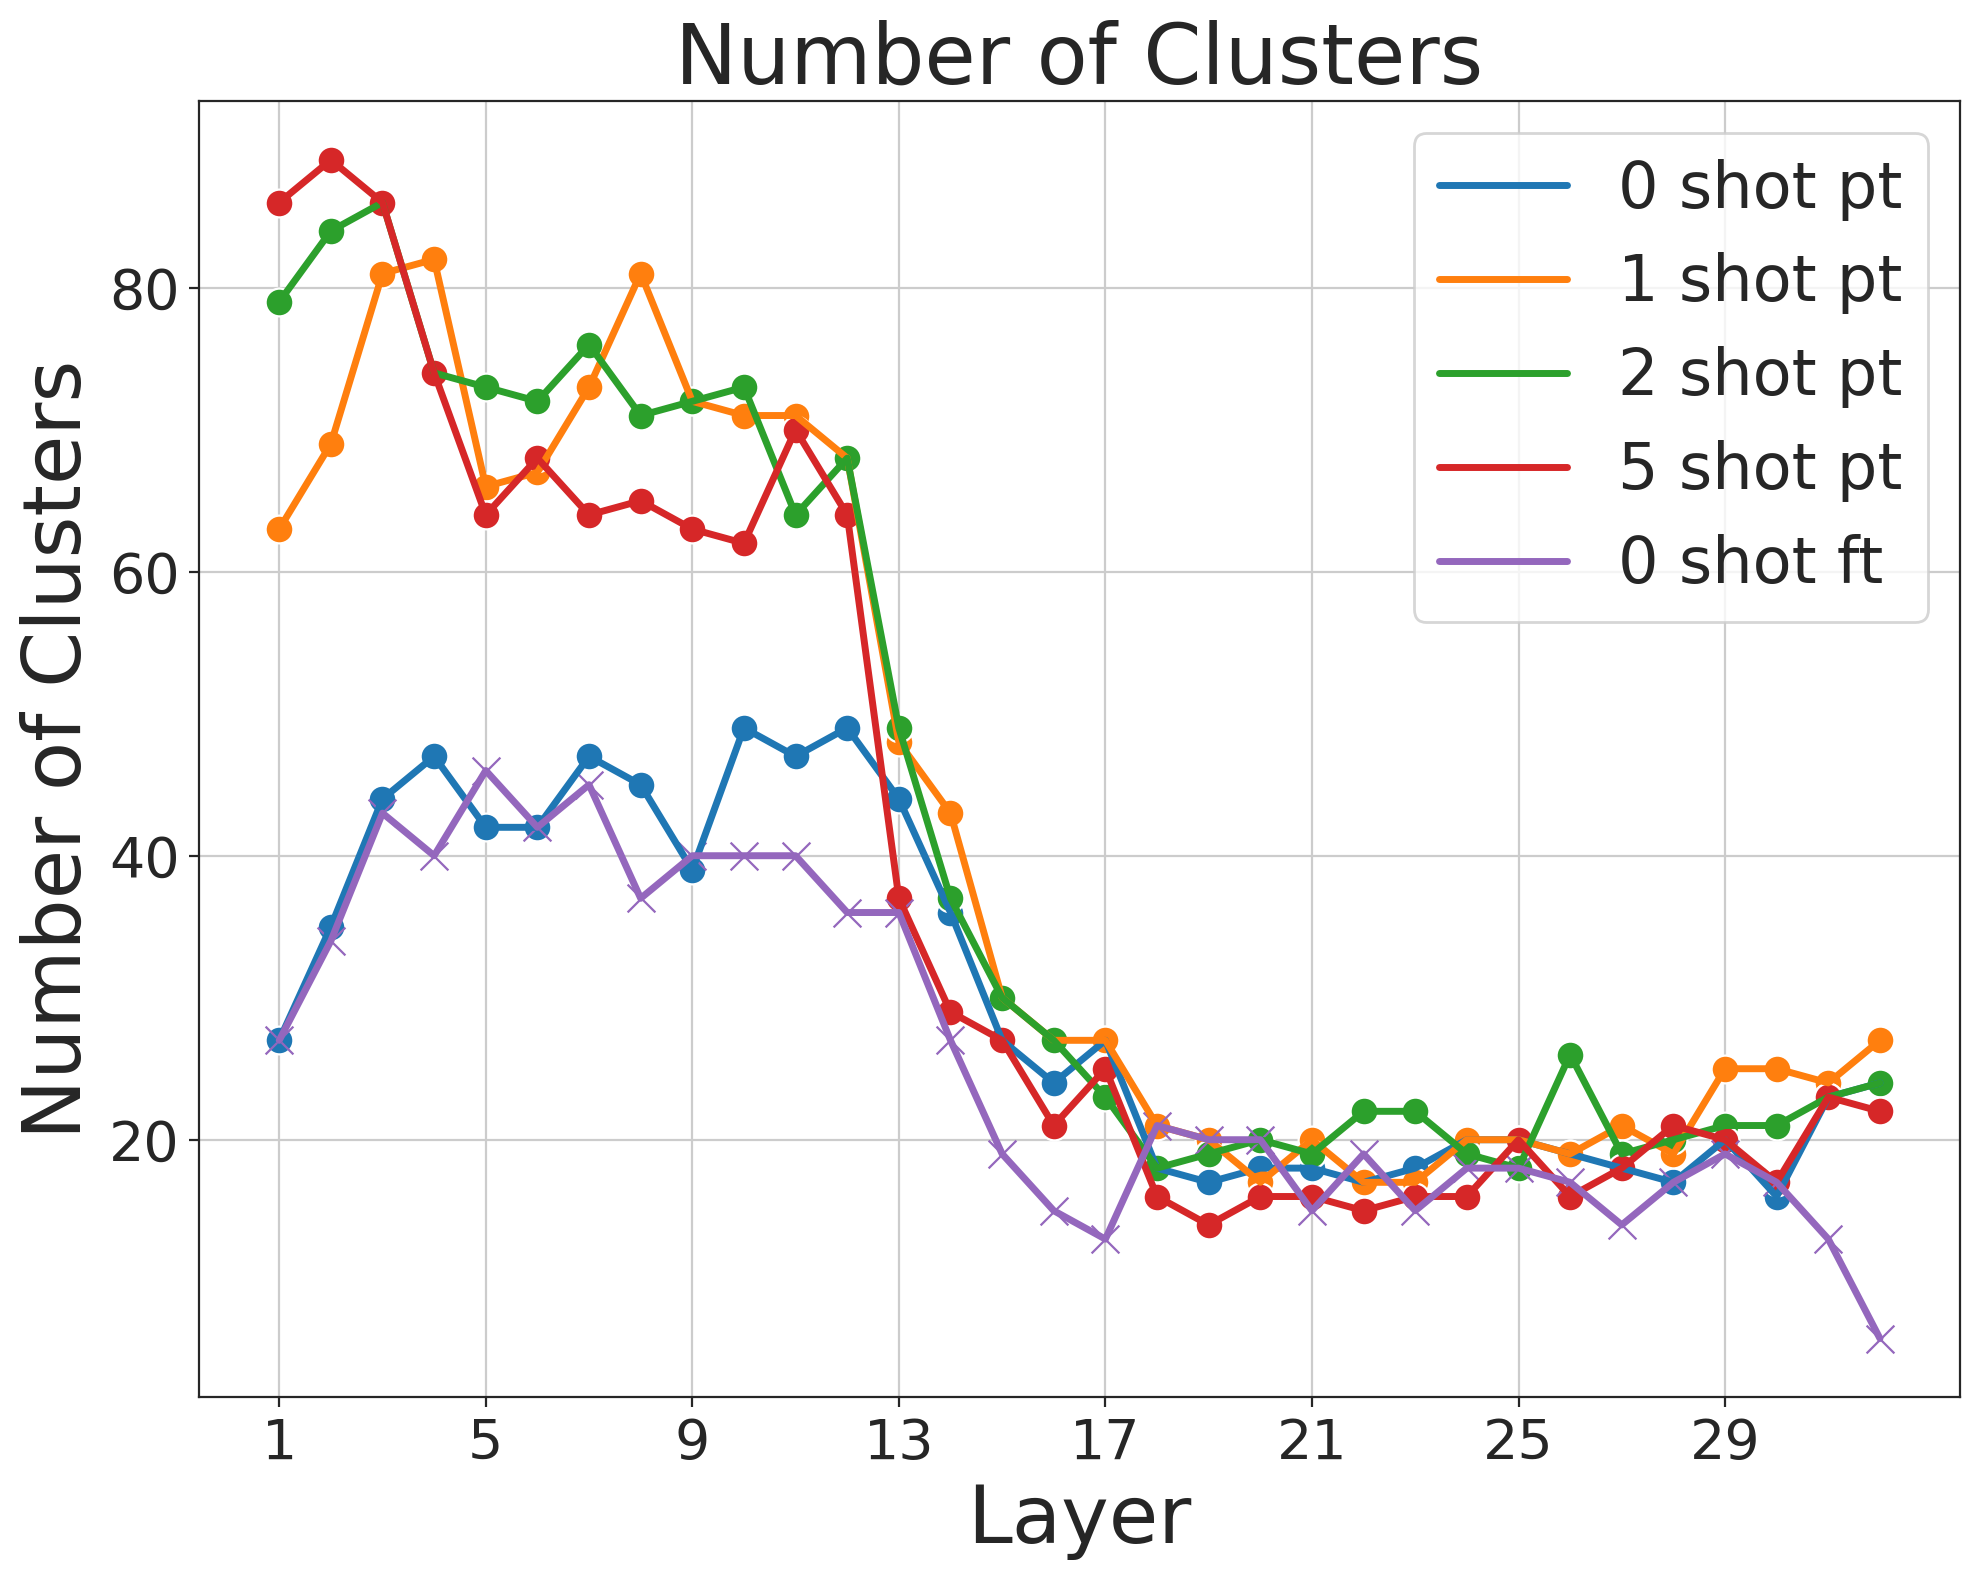

In [18]:
num_clusters = metrics_subject["num_clusters"].to_list()
plotter(num_clusters, "Number of Clusters", "Number of Clusters")

#### Core points

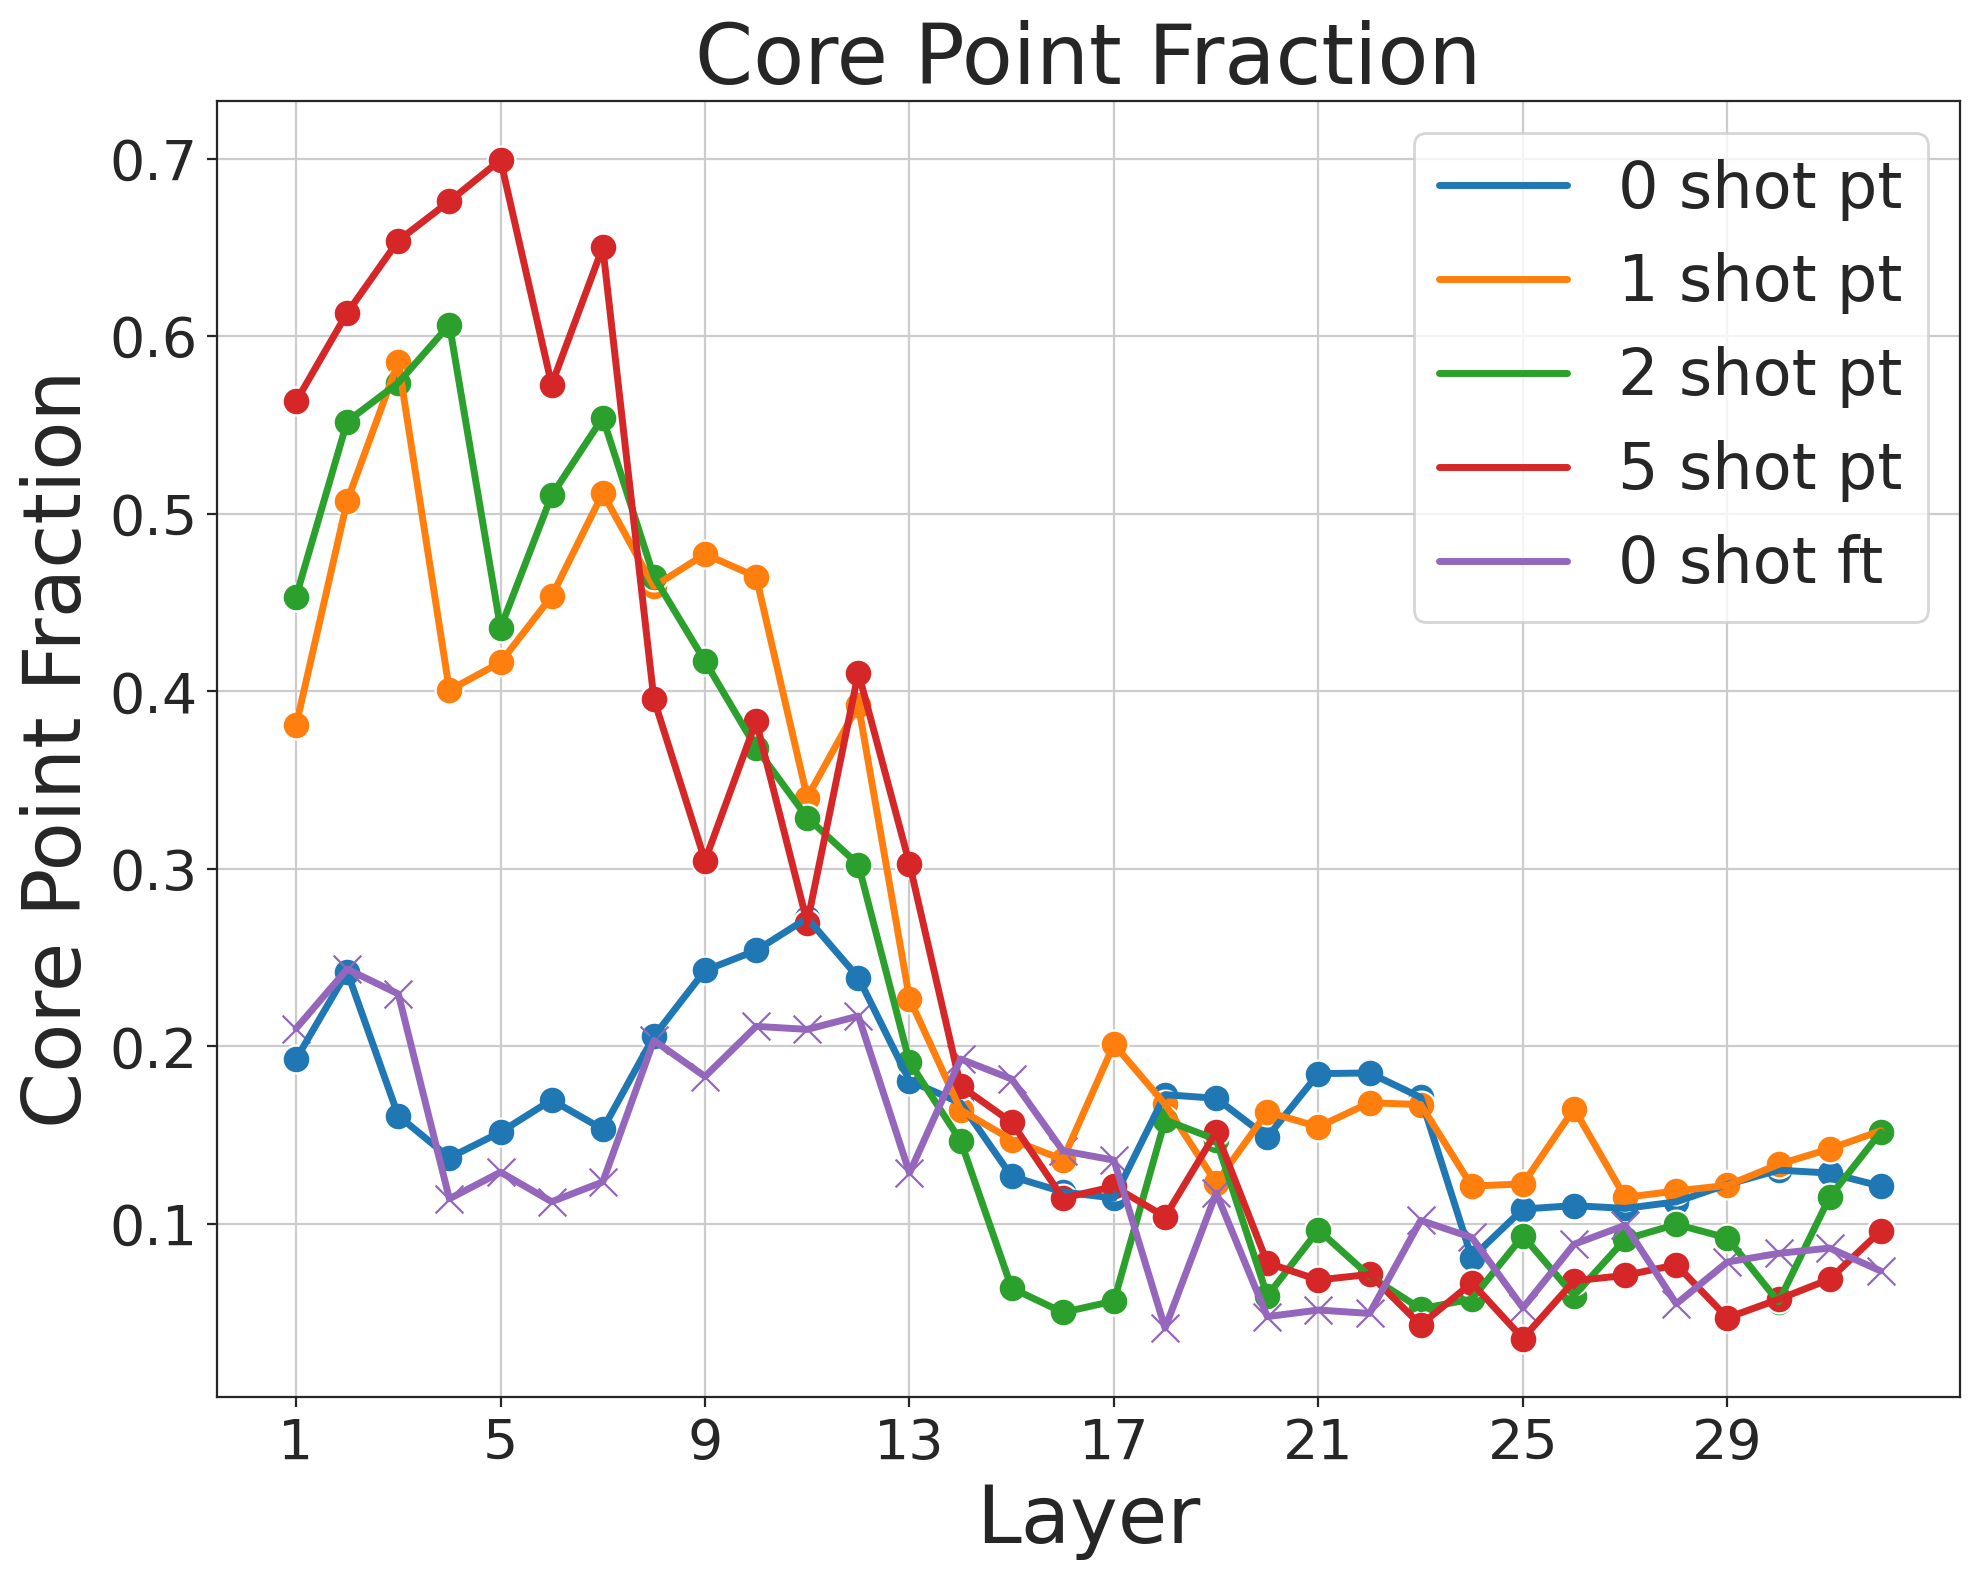

In [19]:
num_clusters = metrics_subject["num_assigned_points"].to_list()
plotter(num_clusters, "Core Point Fraction", "Core Point Fraction")